# Ungraded lab 3: Visualizing word frequencies

*Copyrighted material*

**Objectives:** Visualize and interpret the logistic regression model

**Steps:**
* Plot tweets in a scatter plot as done in ungraded_lab2. Show the number of the tweet in the plot.
* Plot the output of the logistic regression model in the same plot as a solid line

## Import the required libraries

During assigments of weeks 1 and 2 you will make sentiment analysis on tweets. [*NLTK*](http://www.nltk.org/howto/twitter.html) is a opensource Python library to collect and process Twitter data.

NLTK allows to work with 'live' Tweeter data. If you are interested, just review the documentation of the project. But for this project, you are going to use the example dataset that comes alonside with NLTK, which has been manually annotated, and is intented to serve to quickly stablish baselines for your models. 

So, to start let's import the required libraries for this project

In [1]:
import re
import string
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [2]:
import nltk                         # Tweeter toolbox
from os import getcwd
import pandas as pd                 # Library for Dataframes 
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt     # Library for visualization
import numpy as np                  # Library for math functions

# from utils import process_tweet, build_freqs # Our functions for NLP

## Load the NLTK sample dataset

To complete this lab, you need the sample dataset of the previuos lab. Here, we assume the files are already available and we only need to load into Python lists.

In [4]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [5]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets ## Concatenate the lists. 
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

# split the data into two pieces, one for training and one for testing (validation set) 
train_pos  = all_positive_tweets[:4000]
train_neg  = all_negative_tweets[:4000]

train_x = train_pos + train_neg 

print("Number of tweets: ", len(train_x))

Number of tweets:  8000


# Load the extracted features
Load the features created for the tweets sample. They have been already precalculated and saved in a csv file

In [6]:
path = 'https://raw.githubusercontent.com/ChanchalKumarMaji/Natural-Language-Processing-Specialization-deeplearning.ai/master/Natural%20Language%20Processing%20with%20Classification%20and%20Vector%20Spaces/Week%201/logistic_features.csv'

In [7]:
data = pd.read_csv(path);
X = data[['bias', 'positive', 'negative']].values
Y = data['sentiment'].values;
X.shape

(8000, 3)

In [11]:
print(data.head())
print(data.info())

   bias  positive  negative  sentiment
0   1.0    3020.0      61.0        1.0
1   1.0    3573.0     444.0        1.0
2   1.0    3005.0     115.0        1.0
3   1.0    2862.0       4.0        1.0
4   1.0    3119.0     225.0        1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bias       8000 non-null   float64
 1   positive   8000 non-null   float64
 2   negative   8000 non-null   float64
 3   sentiment  8000 non-null   float64
dtypes: float64(4)
memory usage: 250.1 KB
None


## Load a pretrained Logistic Regression model

As part of this week assingment, you are going to train a Logistic regression model. In the cell bellow, you can find the model that you will obtain from such training process. Notice that the whole model is just represented by a list of 3 numeric values, that we have called tetha.

In [8]:
theta = [7e-08, 0.0005239, -0.00055517]

## Plot the samples in a scatter plot

The vector tetha represents a plane that split our feature space in two parts. Samples located over that plane are considered positive, and samples located under that plane are considered negative. Remember that we have a 3D feature space, i.e, each tweet is represented as a vector comprising 3 values: [bias, positive_sum, negative_sum], always having bias = 1. 

If we ignore the bias term, we can plot each tweet in a cartesian plan, using positive_sum and negative_sum. In the bellow cell, we do exactly this. Addicionaly, we color each tweet, pedending on its class. Positive tweets will be green and negative tweets will be red.

Text(0, 0.5, 'Negative')

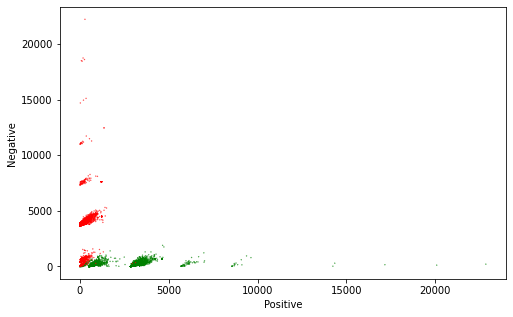

In [13]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 5))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

As you can see, the features that we have chosen to represent tweets as numerical vectors, allows an almost perfect separation between positive and negative tweets. So it is not a surprice anymore that the logistic regression model produce an accuracy around 99%. 

## Plot the model alongside the data

The gray line is just the cutoff between the Positive and Negative region. In other words the gray line marks the line where $$ z = \theta * x = 0.$$
To draw this line, we had to solve the former equation in terms of one of the independent variables

$$ z = \theta * x = 0$$
$$ x = [1, pos, neg] $$
$$ z(\theta, x) = \theta_0+ \theta_1 * pos + \theta_2 * neg = 0 $$
$$ neg = (-\theta_0 - \theta_1 * pos) / \theta_2 $$

In [14]:
# Equation of the separation plane
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (w0 - w1 * pos) / w2
def solution(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation of the derivative of the s
# df(pos, W) = pos * w2 / w1
def solution2(theta, pos):
    return    pos * theta[2] / theta[1]

The green line in the chart points in the direction where z > 0 and the red line points in the direction where z < 0. The direction of these lines are given by the weights $\theta_1$ and $\theta_2$

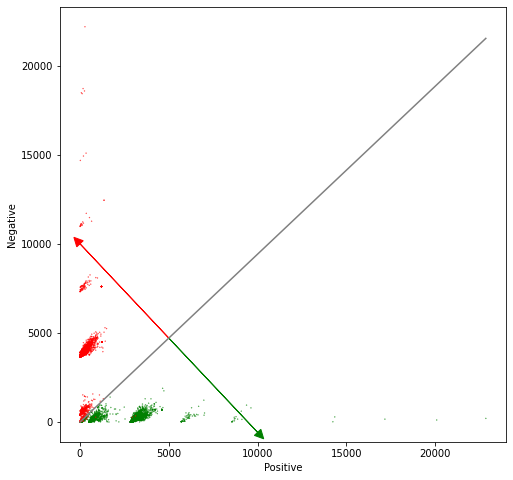

In [15]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

offset = 5000

# Plot the red line that divides the 2 areas.
ax.plot([0,  maxpos], [solution(theta, 0),   solution(theta, maxpos)], color = 'gray') 

# Plot the red line pointing to the negative direction
ax.arrow(offset, solution(theta, offset), offset, solution2(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot the red line pointing to the negative direction
ax.arrow(offset, solution(theta, offset), -offset, -solution2(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()

**Notice that more important than the Logistic regression itself, are the feature that we have extracted from tweeters what allows to get the good results in this exercise.**

That's all folks. Hopefully, now you undestand better what the Logistic regression model represents, 
and why it works that well for this specific problem. 